In [1]:
# To import various libraries

import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

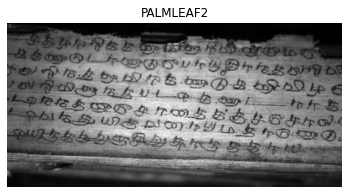

In [2]:
# Function to read 'palmleaf2.pgm' file which is in P5 format.

image2 = Image.open('palmleaf2.pgm')
image2_array = np.array(image2)
plt.imshow(image2, cmap = 'gray')
plt.title('PALMLEAF2')
plt.axis('off')
plt.show()

In [3]:
# Array data related to image palmleaf2.pgm

A,B = image2_array.shape
print(f"Shape of the image array is : {A} , {B}\n")
N = image2_array.size
print("Total number of elements in image array : N =",N,"\n")
L = image2_array.max()
print("Maximum intensity in image array : L =", L)

Shape of the image array is : 196 , 400

Total number of elements in image array : N = 78400 

Maximum intensity in image array : L = 125


In [4]:
# Calculating frequency of all the intensities present in the image palmleaf2.pgm

F = []
for k in range (0,(L+1)):
    c = 0
    for i in range (0,A):
        for j in range (0,B):
            if (image2_array[i,j] == k):
                c = c + 1    
    F.append(c)
    
F = np.array(F)

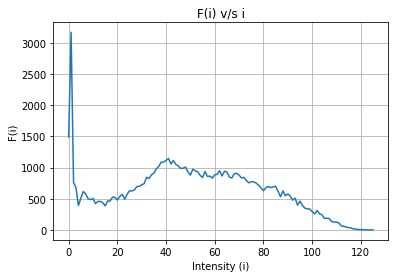

In [5]:
# To plot a graph between frequency of intensity v/s intensity.

p = F.size
x=np.arange(0,p,1)
plt.plot(x, F)
plt.xlabel('Intensity (i)') 
plt.ylabel('F(i)') 
plt.title('F(i) v/s i')
plt.grid()
plt.show() 

In [6]:
# Calculation of between class variance.

variance_b = []

for t in range (0,(L+1)):
    N1 = 0
    for i in range (0,A):
        for j in range (0,B):
            if (image2_array[i,j] <= t):
                N1 = N1 + 1
            
    N2 = N - N1
    
    # mean of first class
    mu1 = 0
    for i in range (0,(t+1)):
        mu1 = mu1 + (i*(F[i]/N1))
        
    # mean of second class
    mu2 = 0
    for i in range ((t+1),(L+1)):
        mu2 = mu2 + (i*(F[i]/N2))
        
    # Total mean of the entire image
    mu_t = 0
    for i in range (0,(L+1)):
        mu_t = mu_t + (i*(F[i]/N))
    
    
    sigma_b_sq = ((mu1-mu_t)*(mu1-mu_t)*(N1/N)) + ((mu2-mu_t)*(mu2-mu_t)*(N2/N))
    
    variance_b.append(sigma_b_sq)
    
variance_b = np.array(variance_b)

In [7]:
# To find the Optimal Threshold.

t_star = variance_b.argmax()
print("Threshold = ",t_star)

Threshold =  50


In [8]:
# Converting into binary image

binry = np.zeros((A,B))
for i in range (0,A):
    for j in range (0,B):
        if (image2_array[i,j] > t_star):
            binry[i,j] = 1

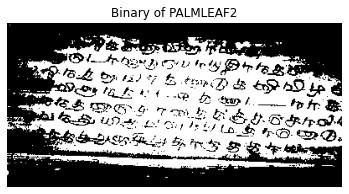

In [9]:
# To display binary image

plt.imshow(binry, cmap='gray')
plt.title('Binary of PALMLEAF2')
plt.axis('off')
plt.show()